# Credit Card Fraud Detection

Anonymized credit card transactions labeled as fraudulent or genuine

Find the dataset and more information on [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) website.

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

## Load Data

In [2]:
data = pd.read_csv("data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Explore Data

<div style="float:left">
    
| Exploration task                                                             | Findings                                             | (Possible) Action(s)                                     |
| ---------------------------------------------------------------------------  | ---------------------------------------------------- | -------------------------------------------------------- |
| Is there any `missing` value?                                                | No missing value.                                    | |
| Check feature scaling even though it is the result of a PCA transformation.  | There are different scales among the 29 features.    | Depending on the ML model, we have to scale the dataset. |
| Double-check class distribution.                                             | Dataset is higly unbalanced - few fraud cases.       | Use of weights; Cross-Validation.                        |
| Check `Amount` distribution.                                                 | Normal and fraud cases overlap.                      | Try to find a way to separate them.                      |

</div>

- In the column *(Possible) Action(s)*, I list possible actions to be taken to handle the findings. This doesn't mean that I'm going to use all of them.

In [3]:
# Missing data
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
# Check on feature scales
data.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,94813.860,47488.146,0.000,54201.500,84692.000,139320.500,172792.000
V1,284807.0,0.000,1.959,-56.408,-0.920,0.018,1.316,2.455
V2,284807.0,0.000,1.651,-72.716,-0.599,0.065,0.804,22.058
V3,284807.0,-0.000,1.516,-48.326,-0.890,0.180,1.027,9.383
V4,284807.0,0.000,1.416,-5.683,-0.849,-0.020,0.743,16.875
V5,284807.0,0.000,1.380,-113.743,-0.692,-0.054,0.612,34.802
V6,284807.0,0.000,1.332,-26.161,-0.768,-0.274,0.399,73.302
V7,284807.0,-0.000,1.237,-43.557,-0.554,0.040,0.570,120.589
V8,284807.0,0.000,1.194,-73.217,-0.209,0.022,0.327,20.007
V9,284807.0,-0.000,1.099,-13.434,-0.643,-0.051,0.597,15.595


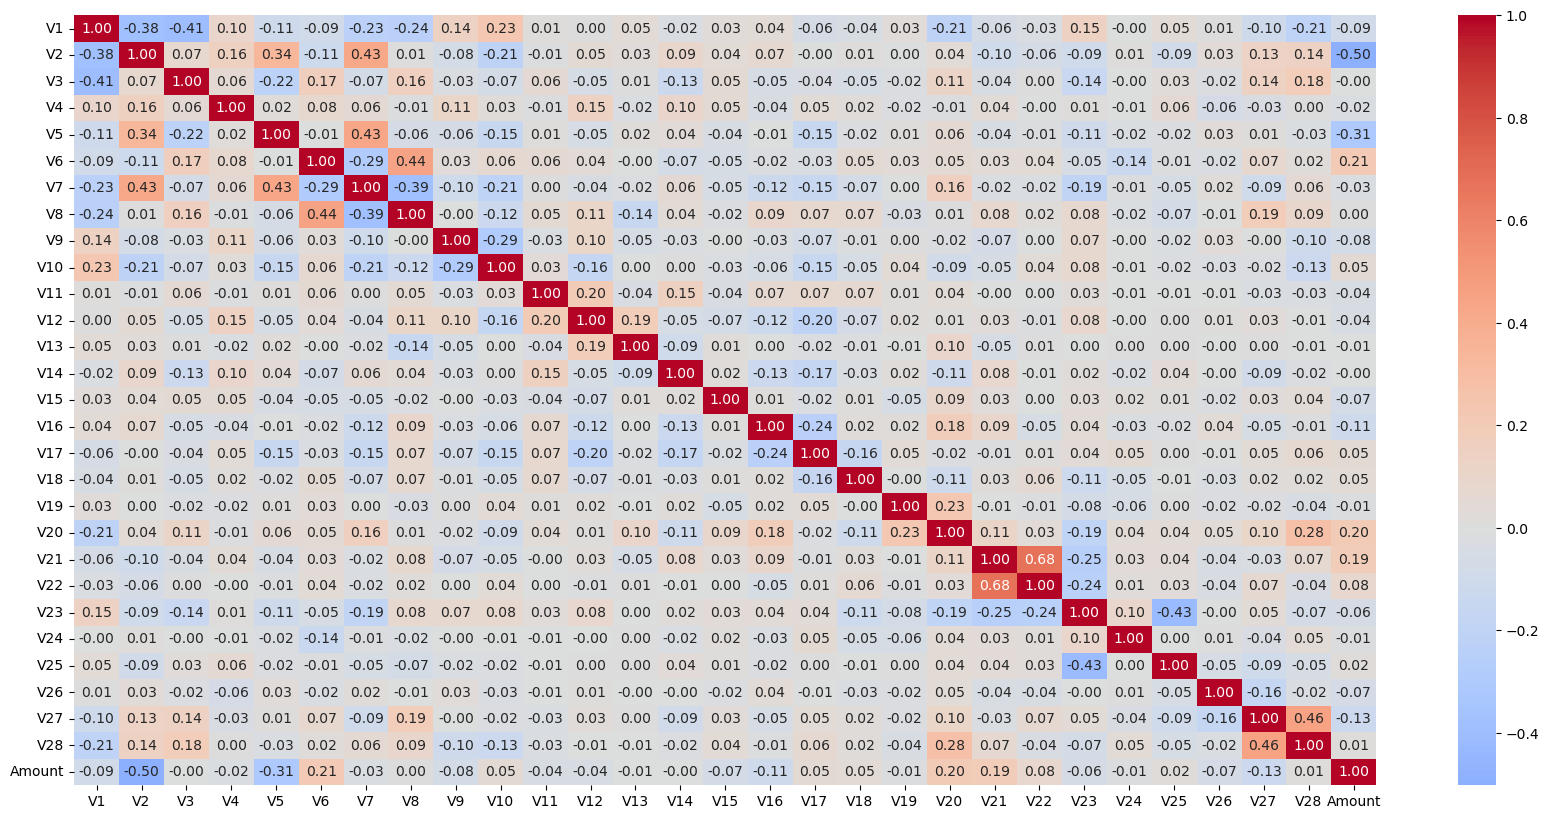

In [5]:
# Feature correlation
fig, ax = plt.subplots(figsize=(21,10))
data_corr = data.drop(columns=["Time", "Class"]).corr(method="spearman")
sns.heatmap(data_corr, cmap="coolwarm", center=0, annot=True, fmt=".2f", ax=ax)
plt.show()

**Moderate correlations (Spearman)**:
- `V2` and `V3`: 0.66
- `V21` and `V22`: 0.68
- `V25` and `V27`: 0.46
- `V4` and `V8`: 0.44
- `Amount` and `V2`: -0.50

**Note**: This is expected because feature `V1` to `V28` are **PCA components**.

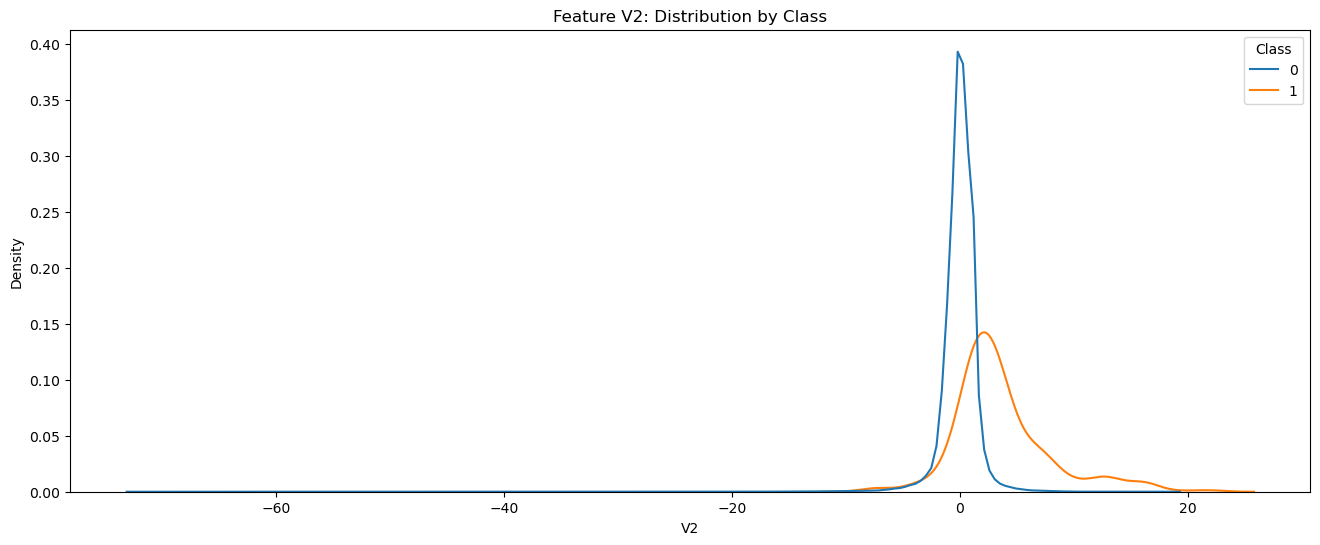

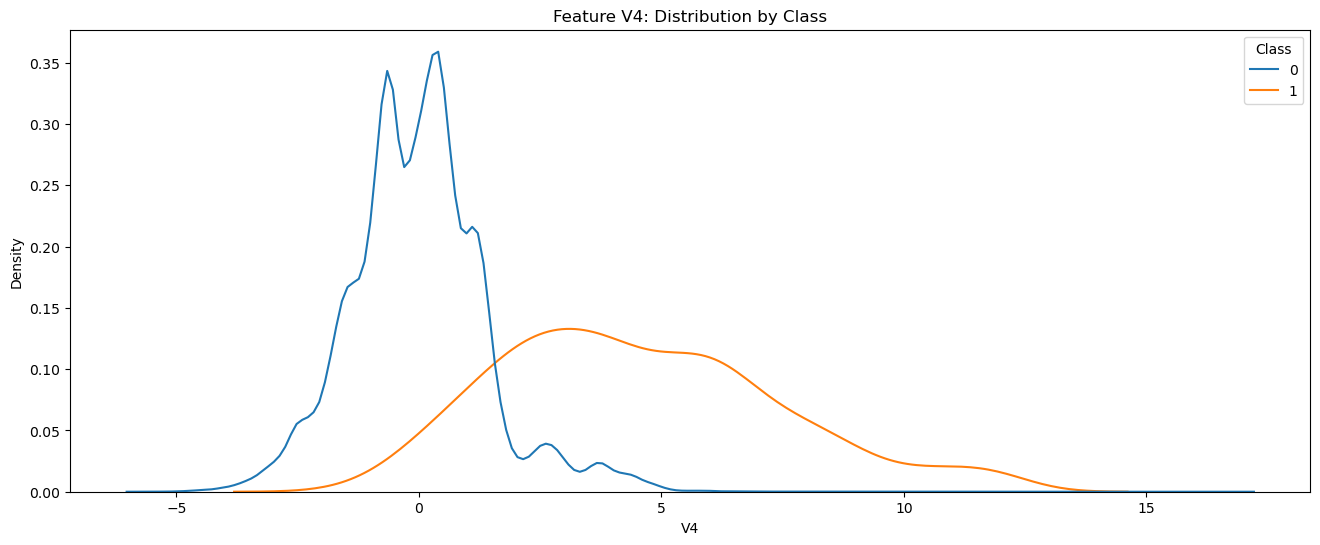

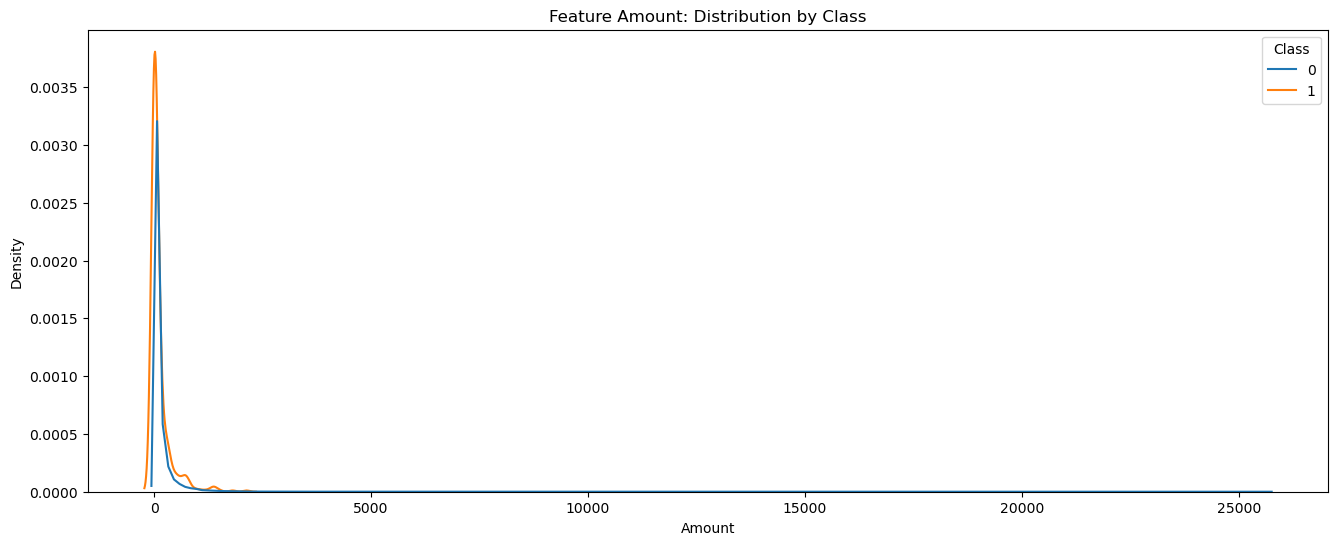

In [6]:
# Plot feature distribution by class
for col in ["V2", "V4", "Amount"]:
    fig, ax = plt.subplots(figsize=(16,6))
    sns.kdeplot(data=data, x=col, hue="Class", common_norm=False, ax=ax)
    ax.set(title=f"Feature {col}: Distribution by Class")
    plt.show()

In [7]:
# Double-check on class distribution
class_counts = data["Class"].value_counts().to_frame()
class_counts["percentage"] = (class_counts["count"]*100) / sum(class_counts["count"])
class_counts

,count,percentage
Class,,
0,284315,99.827251
1,492,0.172749


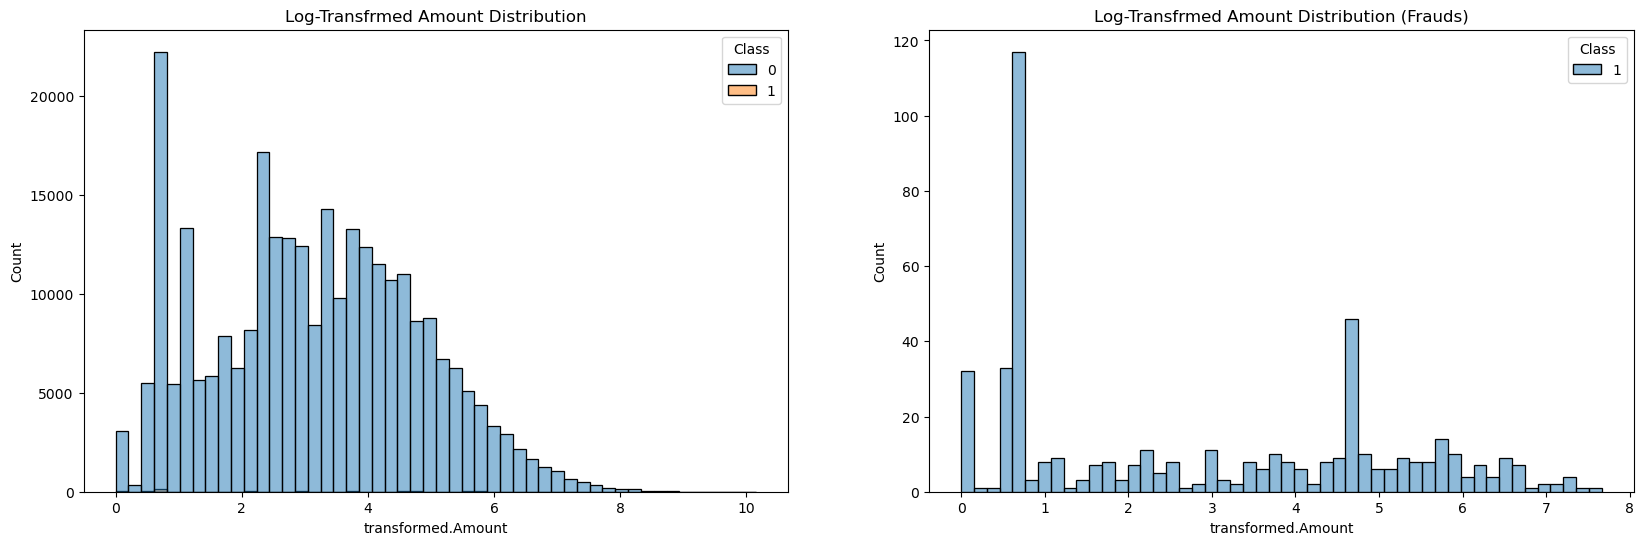

In [8]:
# Check distribution of Amount feature
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

# Amount is highly skewed. Therefore, for better visualization, I apply a log-transformation (log1p)
transformed_amount = np.log1p(data["Amount"])
#transformed_amount.replace([np.inf, -np.inf], np.nan, inplace=True)
#transformed_amount = transformed_amount.dropna()

amount_by_class = transformed_amount.to_frame("transformed.Amount")
amount_by_class["Class"] = data["Class"]

# Plots:
ax0 = sns.histplot(data=amount_by_class, x="transformed.Amount", hue="Class", bins=50, ax=axes[0])
ax1 = sns.histplot(data=amount_by_class[amount_by_class["Class"]==1], x="transformed.Amount", hue="Class", bins=50, ax=axes[1])
ax0.set(title="Log-Transfrmed Amount Distribution");
ax1.set(title="Log-Transfrmed Amount Distribution (Frauds)");

**Remarks**
- Features from V1 to V28 do not have LINEAR correlations (i.e. Tested using Pearson). As informed, this was expected.
- Based on Spearman correlation, `Amount` and `V2` have a moderate monotonic negative correlation (*-0.50*). This mean, as `Amount` increases, `V2` tends to decrease consistently.
- The dataset is highly unbalanced. Anomlous transactions represents only 0.17% of the transactions.
- Anomalous transactions do not have a *low* or *high* amount that distinguish them from the normal ones. It happens all across the amount distribution.

## Preprocessing

The processing steps changes based on which model I'll decide to use. Therefore, each `transformation` occurs in a separate cell.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

In [64]:
# Split dataset
X_data = data.drop(["Time","Class"], axis=1)
y_data = data["Class"]

Xd, X_test, yd, y_test = train_test_split(
    X_data, y_data, test_size=0.20, stratify=y_data, random_state=42)

X = np.array(Xd)
y = np.array(yd)

In [65]:
# Scale data (if needed)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

## Build Model

The following recommendation was provided along with the data:

> Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

Therefore, I will focus on the AUPRC metric to evaluate the results of the models.

### Baseline

Model: **Random Forest**

In [12]:
%%time
from sklearn.ensemble import RandomForestClassifier

kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
baseline_aucpr_scores = []
best_rf_auprc = 0
best_rf_model = None

for fold, (train_idx, val_idx) in enumerate(kfolds.split(X, y)):
    X_train, y_train = X[train_idx], y[train_idx]
    X_val, y_val = X[val_idx], y[val_idx]

    baseline = RandomForestClassifier(class_weight="balanced", random_state=42)
    baseline.fit(X_train, y_train)

    # Prediction : validation dataset
    y_pred = baseline.predict(X_val)
    y_proba = baseline.predict_proba(X_val)

    # AUPRC
    avg_prec_score = average_precision_score(y_val, y_proba[:,1])
    baseline_aucpr_scores.append(avg_prec_score)

    if avg_prec_score > best_rf_auprc:
        best_rf_auprc = avg_prec_score
        best_rf_model = baseline
    
    print(f"Fold {fold+1}: AUPRC={avg_prec_score:.3f}")

print(f"\n(Average) AUPRC={np.mean(baseline_aucpr_scores):.3f}\n")

Fold 1: AUPRC=0.847
Fold 2: AUPRC=0.814
Fold 3: AUPRC=0.820
Fold 4: AUPRC=0.867
Fold 5: AUPRC=0.833

(Average) AUPRC=0.836

CPU times: user 5min 54s, sys: 66 ms, total: 5min 54s
Wall time: 5min 55s


In [13]:
# RF model: Feature importance
rf_importance = pd.DataFrame(best_rf_model.feature_importances_, 
                             columns=["importance"], index=X_data.columns)
rf_importance.sort_values("importance", ascending=False).head(10)

,importance
V10,0.150458
V14,0.145100
V4,0.137244
V12,0.096372
V11,0.082077
V17,0.049086
V7,0.046089
V16,0.045300
V3,0.041761
V19,0.019539


In [14]:
# Perform prediction on test dataset
y_preds = best_rf_model.predict(np.array(X_test))
y_probas = best_rf_model.predict_proba(np.array(X_test))

avg_prec_score = average_precision_score(y_test, y_probas[:,1])
print(f"AUPRC (on Test dataset) = {avg_prec_score}\n")

print(classification_report(y_test, y_preds))

AUPRC (on Test dataset) = 0.8560901413619714

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.99      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



### Isolation Forest

In [15]:
%%time
from sklearn.ensemble import IsolationForest

kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
aucpr_scores = []
best_iso_auprc = 0
best_iso_model = None

for fold, (train_idx, val_idx) in enumerate(kfolds.split(Xs, y)):
    X_train, y_train = X[train_idx], y[train_idx]
    X_val, y_val = X[val_idx], y[val_idx]

    iso = IsolationForest(n_estimators=1000, contamination=0.01, random_state=42)
    iso.fit(X_train)

    y_pred = iso.predict(X_val)
    scores = iso.decision_function(X_val)
    y_pred_bin = (y_pred == -1).astype(int)
    
    avg_prec_score = average_precision_score(y_val, -scores)
    aucpr_scores.append(avg_prec_score)

    if avg_prec_score > best_iso_auprc:
        best_iso_auprc = avg_prec_score 
        best_iso_model = iso
        
    print(f"Fold {fold+1}: AUPRC={avg_prec_score:.3f}")

print(f"\n(Average) AUPRC={np.mean(aucpr_scores):.3f}\n")

Fold 1: AUPRC=0.147
Fold 2: AUPRC=0.194
Fold 3: AUPRC=0.111
Fold 4: AUPRC=0.185
Fold 5: AUPRC=0.135

(Average) AUPRC=0.154

CPU times: user 1min 3s, sys: 33 ms, total: 1min 3s
Wall time: 1min 3s


**ISO Remarks**
- AUPRC was pretty bad. Therefore, I am not going to perform predictions on test dataset.

### XGBoost

In [16]:
%%time
import xgboost as xgb

kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb_aucpr_scores = []
best_xgb_auprc = 0
best_xgb_model = None

for fold, (train_idx, val_idx) in enumerate(kfolds.split(X,y)):
    X_train, y_train = X[train_idx], y[train_idx]
    X_val, y_val = X[val_idx], y[val_idx]

    xgb_model = xgb.XGBClassifier(
        learning_rate=0.1, 
        eval_metric=average_precision_score,
        n_estimators=500,
        max_depth=10,
        colsample_bytree=.5,
    )
    xgb_model.fit(X_train, y_train, verbose=0, 
                  eval_set=[(np.array(X_val), np.array(y_val))],)

    preds = xgb_model.predict(X_val)
    y_proba = xgb_model.predict_proba(X_val)

    avg_prec_score = average_precision_score(y_val, y_proba[:,1])
    xgb_aucpr_scores.append(avg_prec_score)

    if avg_prec_score > best_xgb_auprc:
        best_xgb_auprc = avg_prec_score 
        best_xgb_model = xgb_model

    print(f"Fold {fold+1}: AUPRC={avg_prec_score:.3f}")

print(f"\n(Average) AUPRC={np.mean(xgb_aucpr_scores):.3f}\n")

Fold 1: AUPRC=0.877
Fold 2: AUPRC=0.834
Fold 3: AUPRC=0.840
Fold 4: AUPRC=0.865
Fold 5: AUPRC=0.845

(Average) AUPRC=0.852

CPU times: user 3min 26s, sys: 211 ms, total: 3min 26s
Wall time: 34.6 s


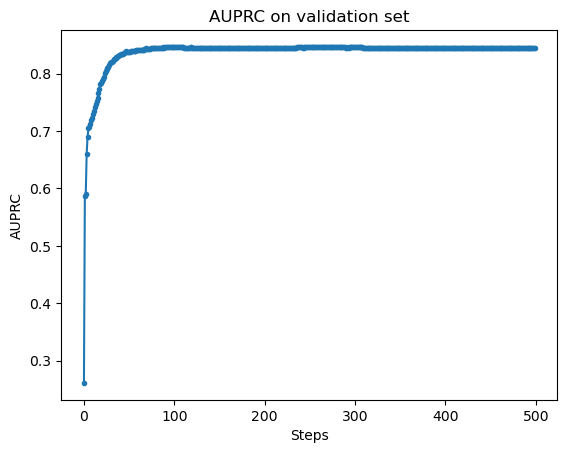

In [17]:
m_eval = xgb_model.evals_result()["validation_0"]["average_precision_score"]
plt.plot(list(range(len(m_eval))), m_eval, marker=".")
plt.title("AUPRC on validation set")
plt.ylabel("AUPRC")
plt.xlabel("Steps")
plt.show()

In [20]:
# XGBoost: feature importance
xgb_importances = pd.DataFrame({
    "feature_importance":xgb_model.feature_importances_},
    index=list(X_data.columns))
xgb_importances.sort_values(
    "feature_importance", 
    ascending=False).head(10)

,feature_importance
V17,0.681823
V10,0.102155
V14,0.035924
V11,0.021384
V16,0.015540
V1,0.014018
V4,0.011634
V8,0.009058
V19,0.007205
V12,0.007010


#### Predictions (XGBoost)

Since we had a reasonable AUPRC, let's try to perform predictions on test dataset.

In [22]:
xgb_predictions = best_xgb_model.predict(X_test)
xgb_pred_proba = best_xgb_model.predict_proba(X_test)

test_auprc = average_precision_score(y_test, xgb_pred_proba[:,1])
print(f"AUPRC (on Test dataset) = {test_auprc:.3f}\n")

print(classification_report(y_test, xgb_predictions))

AUPRC (on Test dataset) = 0.883

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.84      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



#### Evaluating Model's Results - XGBoost

Analyze predictions

In [31]:
import shap
import random

shap.initjs()

In [20]:
# Dataset containing ground truths and predictions
xgb_res = X_test.copy()
xgb_res.reset_index(inplace=True)
xgb_res["y"] = y_test.values
xgb_res["prediction"] = xgb_predictions

# Wrong predictions: FP and FP
wrong_predictions = xgb_res[(xgb_res["prediction"] != xgb_res["y"])]
fp = wrong_predictions[(wrong_predictions["prediction"] == 1) & (wrong_predictions["y"] == 0)]
fn = wrong_predictions[(wrong_predictions["prediction"] == 0) & (wrong_predictions["y"] == 1)]

display(wrong_predictions)

,index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,y,prediction
165,190263,-1.272117,1.827615,-3.810610,0.583759,-0.641242,-1.389043,-1.954054,1.173920,-2.053191,...,0.858775,0.083079,0.741676,-0.173234,0.534870,0.183562,0.020316,0.76,0,1
9179,14170,-15.903635,10.393917,-19.133602,6.185969,-12.538021,-4.027030,-13.897827,10.662252,-2.844954,...,-1.280137,-0.601295,0.040404,0.995502,-0.273743,1.688136,0.527831,99.99,1,0
14231,153398,-2.690251,1.465266,-0.691844,4.322855,-1.086880,0.063585,-2.966872,-0.059646,-0.090827,...,0.259112,0.610188,-0.119366,0.028077,-0.044074,0.005614,0.557189,0.00,0,1
17046,50537,-0.234922,0.355413,1.972183,-1.255593,-0.681387,-0.665732,0.059110,-0.003153,1.122451,...,0.912107,-0.286338,0.451208,0.188315,-0.531846,0.123185,0.039581,1.00,1,0
17063,8464,1.261630,2.797779,-5.458663,3.844880,5.435051,1.844395,1.203394,0.323753,-1.416101,...,-0.972494,-0.592696,0.280911,1.572414,0.491744,-0.025573,0.152650,1.00,0,1
20992,157585,1.934946,0.650678,-0.286957,3.987828,0.316052,-0.099449,-0.021483,-0.172327,0.508730,...,-0.190974,0.219976,-0.216597,-0.136692,-0.129954,-0.050077,-0.051082,1.00,1,0
24570,623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,0
24869,96341,1.227614,-0.668974,-0.271785,-0.589440,-0.604795,-0.350285,-0.486365,-0.010809,-0.794944,...,-0.295255,-0.180459,-0.436539,0.494649,-0.283738,-0.001128,0.035075,98.01,1,0
28390,68067,-1.101847,-1.632441,0.901067,0.847753,-1.249091,0.654937,1.448868,0.023308,-0.136742,...,0.835795,1.179955,-0.029091,-0.300896,0.699175,-0.336072,-0.177587,519.90,1,0
28867,149577,0.007379,2.365183,-2.600287,1.111602,3.276441,-1.776141,2.114531,-0.830084,0.900490,...,-0.902100,-0.404382,-0.012944,0.589836,-0.734449,-0.447529,-0.362375,1.00,1,0


#### Beeswarm plot

Have an overview of predictions

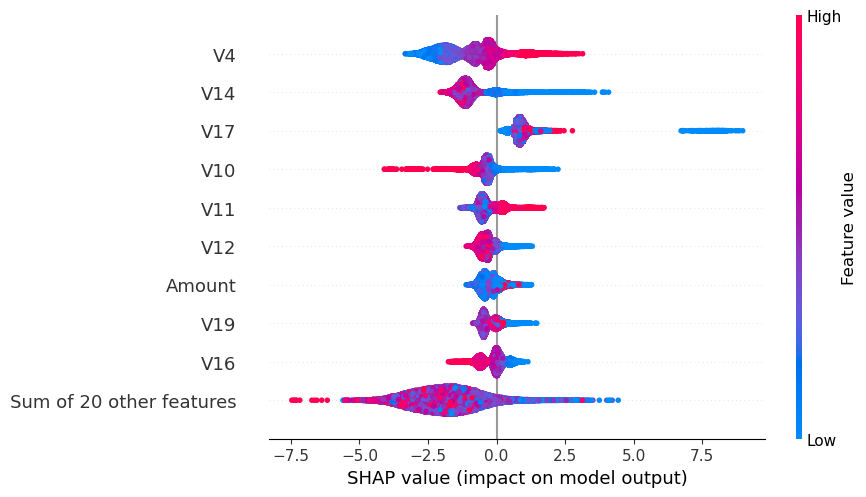

In [21]:
explainer = shap.Explainer(best_xgb_model)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)

#### Waterfall plot

Check individual predictions

IDX number: 34525
Probabilities [0,1]: [0.43927693 0.56072307]
Prediction=0 | True=1


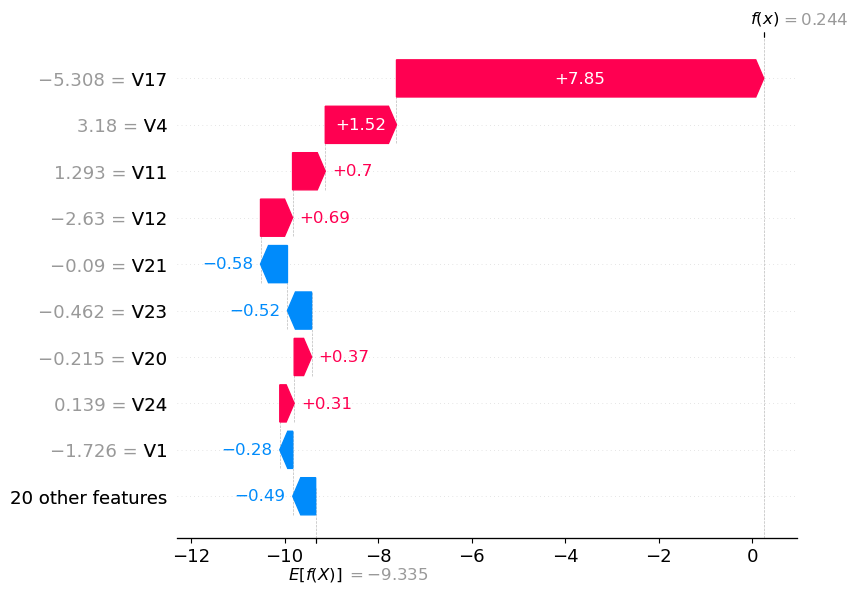

In [30]:
idx_obj = random.choice(wrong_predictions.index) # ex.: 24869 #20992
print(f"IDX number: {idx_obj}")
print(f"Probabilities [0,1]: {xgb_pred_proba[idx_obj]}")
print(f"Prediction={int(y_test.values[idx_obj])} | True={xgb_predictions[idx_obj]}")
shap.plots.waterfall(shap_values[idx_obj]);

#### Absolute mean shap plot

Let's check the feature importance

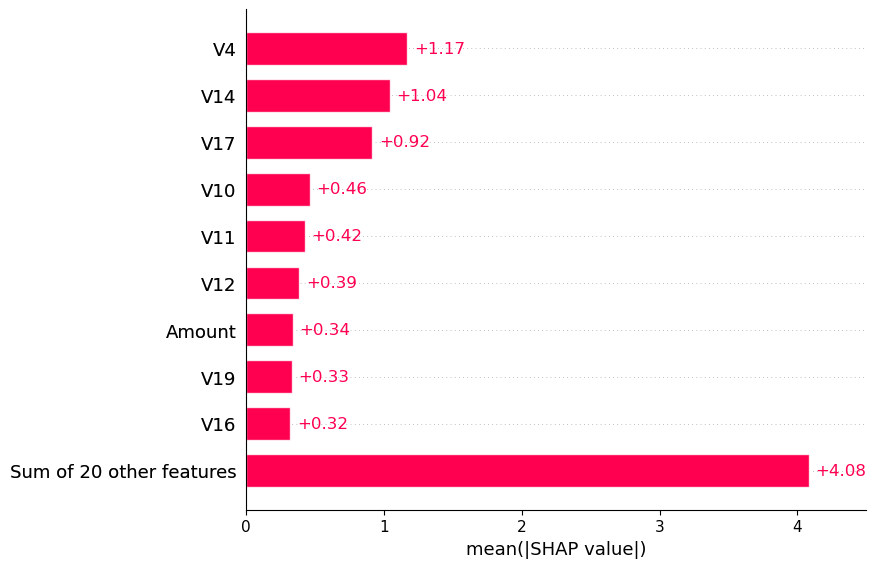

In [32]:
shap.plots.bar(shap_values)

#### Dependence plot(s)

Check dependence

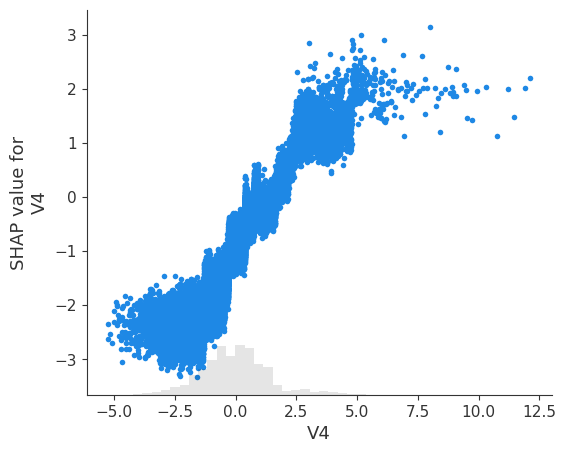

In [33]:
shap.plots.scatter(shap_values[:,"V4"])
#shap.plots.scatter(shap_values[:,"V17"], color=shap_values[:,"V10"])

#### (Stacked) Force plot

Check contributions...

In [34]:
shap.plots.force(shap_values[idx_obj])

In [35]:
# Stacked force plot of wrong predictions
shap.plots.force(shap_values[list(wrong_predictions.index)])

## PyTorch

In [23]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

### Split dataset

In [68]:
Xt = torch.from_numpy(Xs).type(torch.float)
yt = torch.from_numpy(y).type(torch.float)

X_test_tensor = torch.from_numpy(scaler.transform(X_test)).type(torch.float)
y_test_tensor = torch.from_numpy(y_test.to_numpy()).type(torch.float)

X_train, X_val, y_train, y_val = train_test_split(
    Xt, yt, test_size=.10, stratify=y, shuffle=True, random_state=42)

len(X_train), len(X_val), len(X_test_tensor)

(205060, 22785, 56962)

### Create DataLoaders

In [70]:
BATCH_SIZE = 32

train_dl = DataLoader(
    dataset=TensorDataset(X_train, y_train),
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_dl = DataLoader(
    dataset=TensorDataset(X_val, y_val),
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dl = DataLoader(
    dataset=TensorDataset(X_test_tensor, y_test_tensor),
    batch_size=BATCH_SIZE,
    shuffle=False
)

print(f"Dataloaders: {train_dl, val_dl, test_dl}")
print(f"Length of train dataloader: {len(train_dl)} batches of {BATCH_SIZE}")
print(f"Length of train dataloader: {len(val_dl)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dl)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x77cc094c4af0>, <torch.utils.data.dataloader.DataLoader object at 0x77cc094f7ee0>, <torch.utils.data.dataloader.DataLoader object at 0x77cc094c6470>)
Length of train dataloader: 6409 batches of 32
Length of train dataloader: 713 batches of 32
Length of test dataloader: 1781 batches of 32


### Create CC Fraud Detection Model

In [71]:
class CreditCardFraudDetection(nn.Module):
    def __init__(self, input_size:int, hidden_units:int, output_size:int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_size, out_features=hidden_units),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_size)
        )

    def forward(self, x):
        return self.layer_stack(x)

cc_model = CreditCardFraudDetection(
    input_size=X_train.shape[1],
    hidden_units=64, # I tested 32, 64, and 128
    output_size=1
)
cc_model

CreditCardFraudDetection(
  (layer_stack): Sequential(
    (0): Linear(in_features=29, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=1, bias=True)
  )
)

### Create Loss Function and Optimizer

In [72]:
from pytorch_toolbelt.losses import BinaryFocalLoss

# Using Binary Focal Loss => It's good for higly unbalanced datasets
loss_fn = BinaryFocalLoss(alpha=0.17, gamma=2.0)
optimizer = torch.optim.SGD(params=cc_model.parameters(), lr=0.1)

# Tried positive weight with BCEWithLogitsLoss
#y_counts = collections.Counter(y_test.numpy())
#pos_weight = torch.tensor([y_counts[0] / y_counts[1]])
#loss_fn = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

### Define Evaluation Metrics

As mentioned before, the recommender metric is AUPRC.

### Run Training (NN)

In [75]:
%%time
from torchmetrics.classification import BinaryAveragePrecision

torch.manual_seed(42)

epochs = 50
nn_auprcs_scores = []

bap = BinaryAveragePrecision()

for epoch in range(epochs):
        
    train_loss, train_avgp = 0,0
    all_preds = []
    all_targets = []
    
    for batch, (X,y) in enumerate(train_dl):
        cc_model.train()

        y_logits = cc_model(X).squeeze()
        y_pred = torch.round(torch.sigmoid(y_logits))

        loss = loss_fn(y_logits, y)
        train_loss += loss
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(train_dl)

    test_loss, test_avgp = 0,0
    cc_model.eval()
    with torch.inference_mode():
        for X_t, y_t in val_dl:
            test_logits = cc_model(X_t).squeeze(dim=-1)
            #y_probs = torch.round(torch.sigmoid(test_logits))
            y_probs = torch.sigmoid(test_logits)
            
            all_preds.append(y_probs)
            all_targets.append(y_t)

            test_loss += loss_fn(test_logits, y_t)

        test_loss /= len(test_dl)

    all_preds = torch.cat(all_preds)
    all_targets = torch.cat(all_targets)
    bap_score = bap(all_preds, all_targets.long())
    nn_auprcs_scores.append(bap_score)
    
    print(f"Epoch: {epoch} | (Train) Loss={train_loss:.5f} | (Test) Loss={test_loss:.5f} | " +
          f"(Test) AUPRC={bap_score:.3f}")

print(f"\n(Average) AUPRC={np.mean(nn_auprcs_scores):.3f}\n")

Epoch: 0 | (Train) Loss=0.00120 | (Test) Loss=0.00018 | (Test) AUPRC=0.620
Epoch: 1 | (Train) Loss=0.00033 | (Test) Loss=0.00016 | (Test) AUPRC=0.649
Epoch: 2 | (Train) Loss=0.00028 | (Test) Loss=0.00015 | (Test) AUPRC=0.656
Epoch: 3 | (Train) Loss=0.00026 | (Test) Loss=0.00015 | (Test) AUPRC=0.673
Epoch: 4 | (Train) Loss=0.00025 | (Test) Loss=0.00015 | (Test) AUPRC=0.692
Epoch: 5 | (Train) Loss=0.00024 | (Test) Loss=0.00015 | (Test) AUPRC=0.694
Epoch: 6 | (Train) Loss=0.00024 | (Test) Loss=0.00014 | (Test) AUPRC=0.732
Epoch: 7 | (Train) Loss=0.00023 | (Test) Loss=0.00014 | (Test) AUPRC=0.728
Epoch: 8 | (Train) Loss=0.00023 | (Test) Loss=0.00014 | (Test) AUPRC=0.753
Epoch: 9 | (Train) Loss=0.00022 | (Test) Loss=0.00014 | (Test) AUPRC=0.755
Epoch: 10 | (Train) Loss=0.00022 | (Test) Loss=0.00014 | (Test) AUPRC=0.746
Epoch: 11 | (Train) Loss=0.00021 | (Test) Loss=0.00014 | (Test) AUPRC=0.768
Epoch: 12 | (Train) Loss=0.00021 | (Test) Loss=0.00014 | (Test) AUPRC=0.763
Epoch: 13 | (Train) Lo

#### Predictions (NN)

Since we had a reasonable AUPRC, let's try to perform predictions on test dataset.

In [76]:
cc_model.eval()
with torch.inference_mode():
    y_logits = cc_model(X_test_tensor).squeeze(dim=1)
    nn_pred_proba = torch.sigmoid(y_logits)
    nn_pred = torch.round(nn_pred_proba)

test_nn_auprc = bap(nn_pred_proba, y_test_tensor.long())
print(f"AUPRC (on Test dataset) = {test_nn_auprc:.3f}\n")

print(classification_report(y_test_tensor, nn_pred))

AUPRC (on Test dataset) = 0.861

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.96      0.69      0.80        98

    accuracy                           1.00     56962
   macro avg       0.98      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962



## Conclusion

For the Credict Card Fraud detection case, I built four different models: 
- Random Forest (Baseline),
- Isolation Forest,
- XGBoost, and
- Neural Network (i.e. using PyTorch).

According the problem's description, the model should be evaluated using **AUPRC** metric because the dataset is highly unbalanced.

The following table shows the AUPRC on validation test dataset.

<div style="float:left">
    
| Model             | (avg) AUPRC | (Best) AUPRC |
| ----------------- | ----------  | ------------ |
| Random Forest     | 0.836       | 0.867        |
| Isolation Forest  | 0.154       | 0.194        |
| XGBoost           | 0.852       | 0.877        |
| Neural Network    | 0.766       | 0.794        | 

</div>

For the models that achieved **AUPRC of, at least, 0.8** on validation dataset, I performed fraud detection on the test dataset using the best model (i.e. based on AUPRC metric):

<div style="float:left">
    
| Model             | AUPRC    | 
| ----------------- | -------- |
| Random Forest     | 0.856    |
| XGBoost           | 0.883    |
| Neural Network    | 0.861    |

</div>

Therefore, based on the above tables, we should use **XGBoost**. <br>
It is slightly better (i.e. AUPRC on test) than **Random Forest** and **Neural Network**, and it is also faster.

Also, it is import to mention that, besides my efforts to fine-tunning the models, I believe there's still room for improvements. Thus, I conclude this experiment which focused on explore the transactional data and build a machine learning model to detect fraud transactions. I might revisit this case in the future to work on the improvements, but, for now, this should be assumed as the first delivery.

____

## Saving model

Since this is our first deliver, I am serializing the **XGBoost** model. Thus, I can work on the model's deployment.
Another option is to use **MLflow** to keep tracking experiments and save models.

In [85]:
import os
import joblib

model_path = "models"
if not os.path.isdir(model_path):
    print("Creating model directory...")
    os.makedirs(model_path)

xgb_model.save_model(f"{model_path}/fraud_detection_xgboost.model")

As a next step, I'll deploy this XGBoost model in a **streaming (real-time) environment**.

___

*If you want to contribute, please feel free to reach out to me at any time.*